# Morphological Operators

Morphological operators are sets of kernels that can achieve a variety of effects such as reducing noise. Certain operators are very good at reducing black points on a white background (and vice versa).

Certain operators can achieve an erosion and dilation effect that can add or erode from an existing image. This effect is most easily seen on text data.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [9]:
def load_img():
    blank_img = np.zeros((600, 600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='ABCDE', org=(50, 300), fontFace=font, fontScale=5, color=(255, 255, 255), thickness=25,
                lineType=cv2.LINE_AA)
    return blank_img

In [10]:
def display_img(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

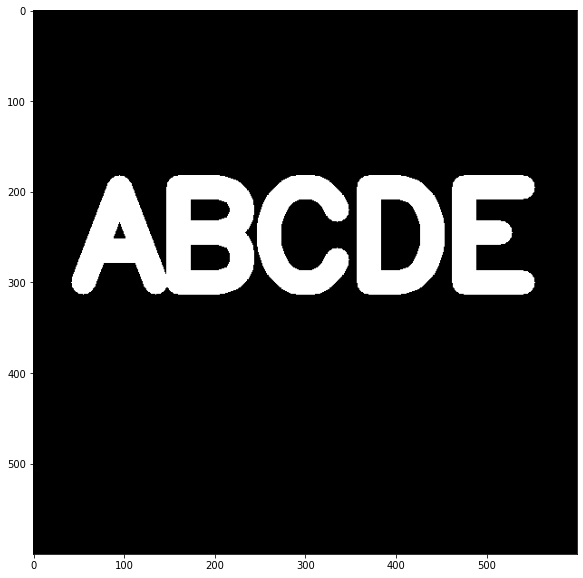

In [11]:
img = load_img()
display_img(img)

In [12]:
kernel = np.ones((5, 5), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [15]:
result = cv2.erode(img, kernel, iterations=4)

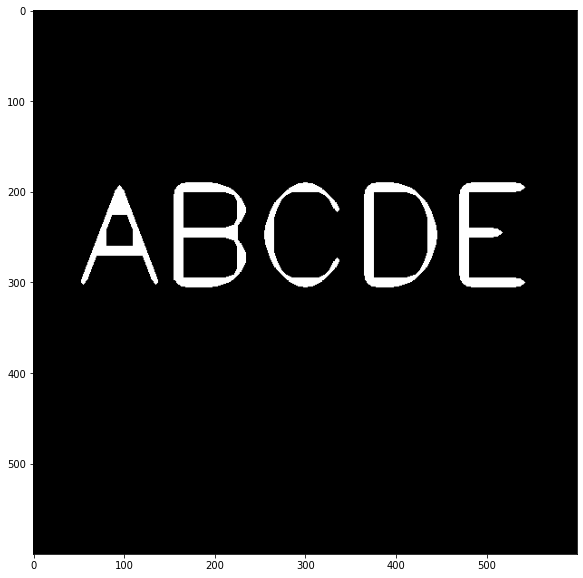

In [16]:
display_img(result)

In [17]:
# Removing background noise

img = load_img()

In [18]:
white_noise = np.random.randint(low=0, high=2, size=(600, 600))

In [19]:
white_noise

array([[1, 1, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 1]])

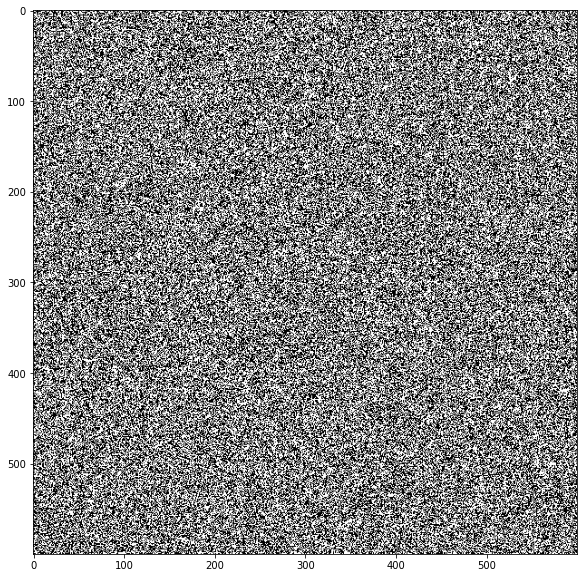

In [20]:
display_img(white_noise)

In [21]:
img.max()

255.0

In [22]:
white_noise = white_noise * 255

In [23]:
white_noise

array([[255, 255,   0, ...,   0,   0, 255],
       [  0, 255, 255, ..., 255,   0, 255],
       [255,   0,   0, ..., 255,   0,   0],
       ...,
       [  0,   0, 255, ..., 255,   0,   0],
       [255, 255, 255, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0, 255, 255]])

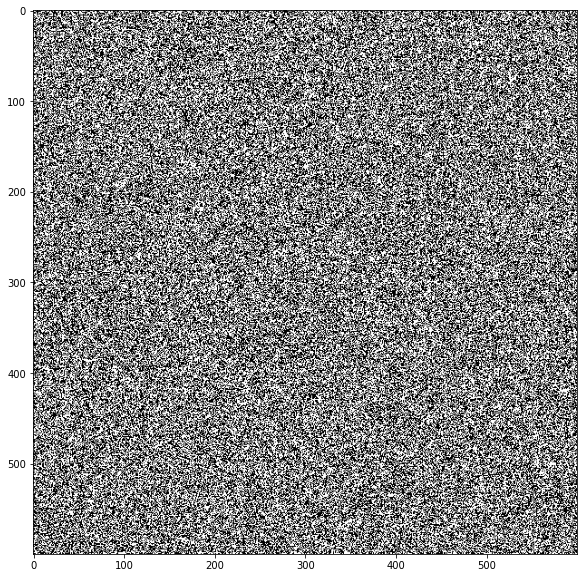

In [24]:
display_img(white_noise)

In [25]:
noise_image = white_noise + img

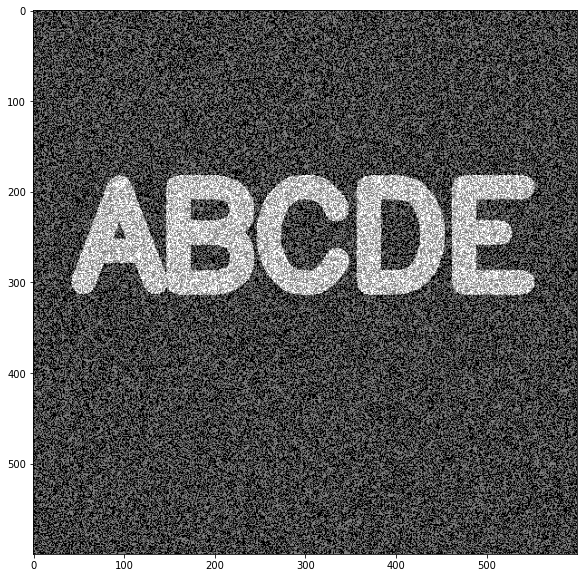

In [26]:
display_img(noise_image)

In [27]:
opening = cv2.morphologyEx(noise_image, cv2.MORPH_OPEN, kernel)

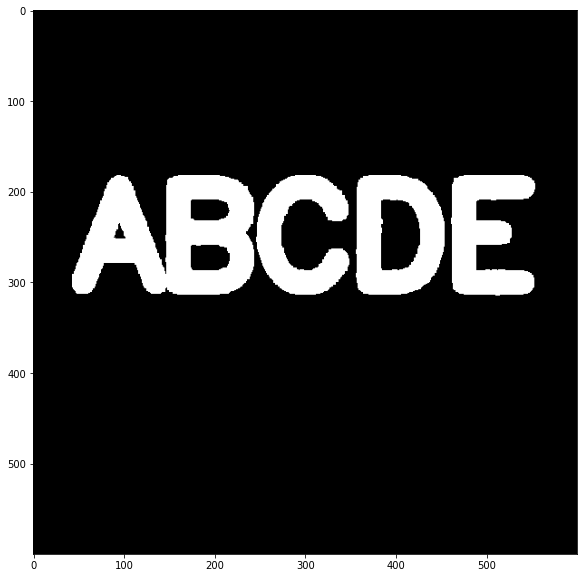

In [28]:
display_img(opening)

In [29]:
# Removing Foreground noise

black_noise = np.random.randint(low=0, high=2, size=(600, 600))

In [30]:
black_noise

array([[1, 0, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 0, 1]])

In [31]:
black_noise = black_noise * -255

In [32]:
black_noise

array([[-255,    0,    0, ..., -255,    0, -255],
       [-255, -255, -255, ...,    0,    0, -255],
       [-255,    0, -255, ...,    0,    0, -255],
       ...,
       [   0,    0,    0, ...,    0, -255,    0],
       [-255,    0,    0, ...,    0, -255,    0],
       [-255, -255,    0, ..., -255,    0, -255]])

In [33]:
black_noise_img = img + black_noise
black_noise_img

array([[-255.,    0.,    0., ..., -255.,    0., -255.],
       [-255., -255., -255., ...,    0.,    0., -255.],
       [-255.,    0., -255., ...,    0.,    0., -255.],
       ...,
       [   0.,    0.,    0., ...,    0., -255.,    0.],
       [-255.,    0.,    0., ...,    0., -255.,    0.],
       [-255., -255.,    0., ..., -255.,    0., -255.]])

In [34]:
black_noise_img[black_noise_img == -255] = 0

In [35]:
black_noise_img.min()

0.0

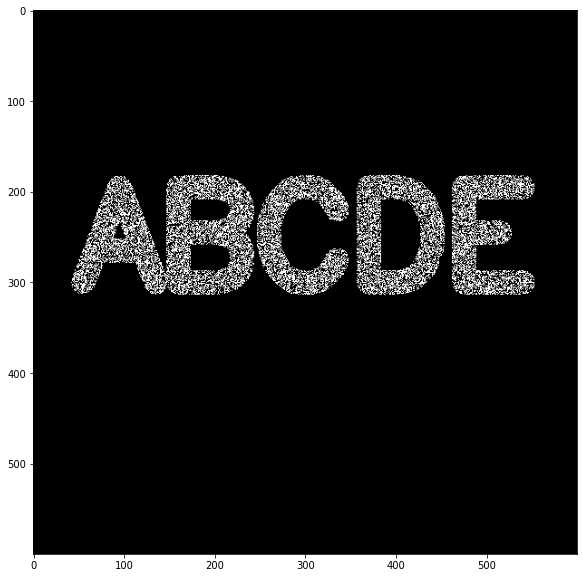

In [36]:
display_img(black_noise_img)

In [37]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

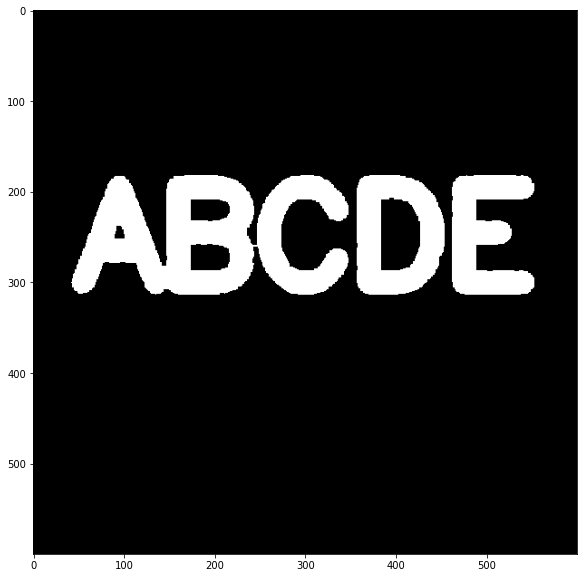

In [38]:
display_img(closing)

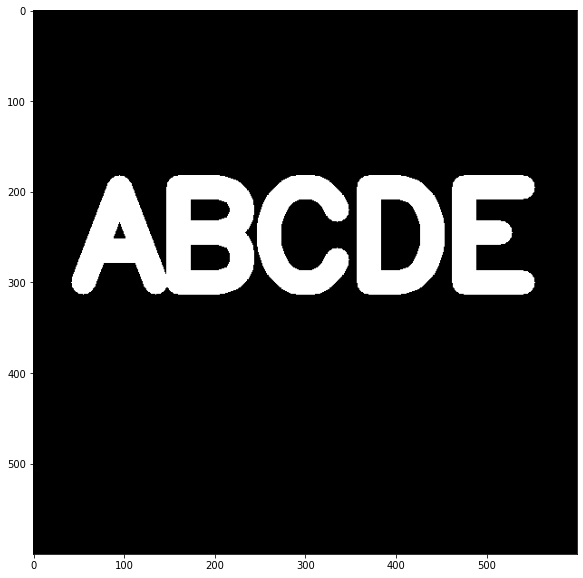

In [39]:
img = load_img()
display_img(img)

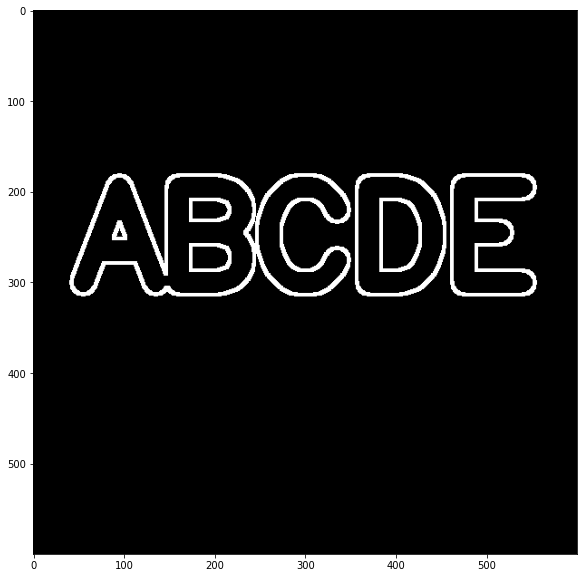

In [40]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)